<a href="https://colab.research.google.com/github/BahaFalcon/3.5HW/blob/main/Mash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving file(7).csv to file(7).csv


In [ ]:
df = pd.read_csv('file(7).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   brand                            10000 non-null  object 
 1   model                            10000 non-null  object 
 2   location                         9950 non-null   object 
 3   views                            9950 non-null   float64
 4   likes                            7622 non-null   float64
 5   adv_added                        9950 non-null   object 
 6   today                            10000 non-null  object 
 7   usd_price                        9950 non-null   float64
 8   price_kgs                        9950 non-null   float64
 9   Год выпуска                      9950 non-null   object 
 10  Пробег                           9585 non-null   object 
 11  Кузов                            9950 non-null   object 
 12  Цвет               

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Двигатель', 'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня',
       'Обмен', 'Наличие', 'Регион, город продажи', 'Учёт', 'Прочее',
       'description', 'обвес', 'тонировка', 'спойлер', 'кожа', 'дерево', 'CD',
       'DVD', 'MP3', 'USB', 'антиблокировочная система (ABS)',
       'антипробуксовочная система', 'система курсовой устойчивости',
       'подушки безопасности', 'парктроник', 'камера заднего вида',
       'полный электропакет', 'сигнализация', 'кондиционер', 'климат контроль',
       'круиз-контроль', 'подогрев передних сидений', 'подогрев всех сидений',
       'обогрев зеркал', 'пневмоподвеска', 'память сидений', 'память руля',
       'датчик дождя', 'датчик света', 'корректор фар', 'центральный замок',
       'литые диски', 'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон',
       'омыватель фар', 'газобалонное 

# Год выпуска

In [ ]:
df.dropna(subset=['Год выпуска', 'Пробег', 'usd_price'], inplace=True)

In [ ]:
df['Год выпуска'].unique()

array(['2015', '2020', '2013', '2005', '2017', '2010', '2023', '2021',
       '2004', '2022', '2009', '2016', '2019', '2018', '2008', '2007',
       '2003', '2000', '2012', '2011', '2002', '1990', '2014', '2006',
       '1994', '1998', '1993', '1999', '1996', '1997', '1991', '1992',
       '2001', '1995', '1988', '1989', '1965', '1985', '1978', '1983',
       '1954', '1984', '1986', '1987', '1982', '1963', '1973', '1981',
       '1960', '1976'], dtype=object)

In [ ]:
df['Год выпуска'] = df['Год выпуска'].str.replace(', новый', '')

In [ ]:
df['Год выпуска'] = df['Год выпуска'].astype(int)

# Пробег

In [ ]:
df['Пробег'] = df['Пробег'].str.replace(' км', '')
df['Пробег'] = df['Пробег'].astype(int)

In [ ]:
df['Пробег'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9585 entries, 0 to 9999
Series name: Пробег
Non-Null Count  Dtype
--------------  -----
9585 non-null   int64
dtypes: int64(1)
memory usage: 149.8 KB


In [ ]:
def adv_clean(x: str) -> int:
  if 'д.' in x:
    return int(x.replace(' д. назад', '')) * 24
  elif 'мес.' in x:
    return int(x.replace(' мес. назад', '')) * 30 * 24
  elif 'ч.' in x:
    return int(x.replace(' ч. назад', ''))
  elif 'мин.' in x:
    return int(x.replace(' мин. назад', '')) / 60
  elif 'год' in x:
    return int(x.replace(' год назад', '')) * 24 * 30 * 365

In [ ]:
df.drop(df[df['adv_added'] == '2 года назад'].index, inplace=True)

In [ ]:
df.adv_added = df.adv_added.map(adv_clean)

# Двигатель

In [ ]:
df['Двигатель'] = df['Двигатель'].map(lambda i: list(map(lambda j: j.strip(), i.split('\n'))))

In [ ]:
df['engine_type'] = df['Двигатель'].map(lambda i: i[-1])

In [ ]:
df['engine_type'] = df['engine_type'].map(lambda i: 'электро' if 'электро' in i else i)

In [ ]:
df['engine_volume'] = df['Двигатель'].map(lambda i: np.nan if 'электро' in i[0] else i[0]).astype(float)

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Двигатель', 'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня',
       'Обмен', 'Наличие', 'Регион, город продажи', 'Учёт', 'Прочее',
       'description', 'обвес', 'тонировка', 'спойлер', 'кожа', 'дерево', 'CD',
       'DVD', 'MP3', 'USB', 'антиблокировочная система (ABS)',
       'антипробуксовочная система', 'система курсовой устойчивости',
       'подушки безопасности', 'парктроник', 'камера заднего вида',
       'полный электропакет', 'сигнализация', 'кондиционер', 'климат контроль',
       'круиз-контроль', 'подогрев передних сидений', 'подогрев всех сидений',
       'обогрев зеркал', 'пневмоподвеска', 'память сидений', 'память руля',
       'датчик дождя', 'датчик света', 'корректор фар', 'центральный замок',
       'литые диски', 'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон',
       'омыватель фар', 'газобалонное 

In [ ]:
df.drop(['Рассрочка', '\nСообщение *\n', '\nВаше имя *\n', 'Unnamed: 70', 'Двигатель'], axis=1, inplace=True)

In [ ]:
df.drop(['VIN', 'Обмен'], axis=1, inplace=True)

In [ ]:
df_options = df[['обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон', 'комбинированный', 'автозавод',
       'велюр']]

In [ ]:
df_options

,обвес,тонировка,спойлер,кожа,дерево,CD,DVD,MP3,USB,антиблокировочная система (ABS),...,люк,бортовой компьютер,сабвуфер,биксенон,омыватель фар,газобалонное оборудование,ксенон,комбинированный,автозавод,велюр
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9996,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df_options.columns:
  df_options[col] = df_options[col] / df_options[col].sum()
df_options

<ipython-input-26-6ea0e42a61a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_options[col] = df_options[col] / df_options[col].sum()


,обвес,тонировка,спойлер,кожа,дерево,CD,DVD,MP3,USB,антиблокировочная система (ABS),...,люк,бортовой компьютер,сабвуфер,биксенон,омыватель фар,газобалонное оборудование,ксенон,комбинированный,автозавод,велюр
0,0.00042,0.000253,0.000405,0.0003,0.000509,0.000267,0.000351,0.000228,0.000245,0.000209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0003,0.000509,0.000267,0.000351,0.000228,0.000245,0.000209,...,0.000424,0.000343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00042,0.000253,0.000405,0.0003,NaN,0.000267,0.000351,0.000228,0.000245,0.000209,...,0.000424,0.000343,0.0007,0.000693,0.000838,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,NaN,0.000267,0.000351,0.000228,0.000245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000493
9996,0.00042,0.000253,NaN,NaN,NaN,0.000267,NaN,NaN,0.000245,0.000209,...,0.000424,NaN,NaN,NaN,NaN,0.001479,NaN,NaN,NaN,0.000493
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_options.sum(axis=1) * 100

0       1.155046
1       0.000000
2       0.000000
3       0.813824
4       1.393224
          ...   
9994    0.158399
9996    0.679120
9997    0.042859
9998    0.000000
9999    0.000000
Length: 9584, dtype: float64

In [ ]:
df['complectation_scor'] = df_options.sum(axis=1) * 100

In [ ]:
df['complectation_scor'].describe()

count    9584.000000
mean        0.427796
std         0.466430
min         0.000000
25%         0.000000
50%         0.291824
75%         0.767997
max         1.891149
Name: complectation_scor, dtype: float64

# Визуализация

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'description', 'обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон

In [ ]:
df.brand.value_counts()

Toyota     2070
Honda      1004
Kia        1004
Hyundai     871
Lexus       831
           ... 
Changan       1
ORA           1
Tank          1
FAW           1
Fiat          1
Name: brand, Length: 71, dtype: int64

<Axes: xlabel='brand'>

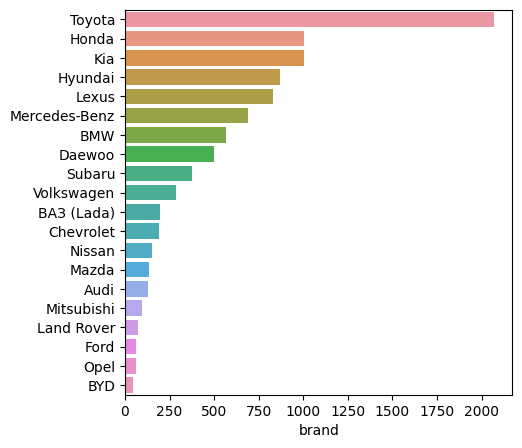

In [ ]:
plt.subplots(figsize=(5, 5))
sns.barplot(y = df.brand.value_counts().index[:20], x = df.brand.value_counts()[:20])

In [ ]:
df[df.brand == 'Toyota'].model.value_counts()

Camry           675
RAV4            223
Highlander      138
Prius           124
Land Cruiser     91
               ... 
Mark X ZiO        1
Verossa           1
Camry Solara      1
Voxy              1
HiAce             1
Name: model, Length: 80, dtype: int64

In [ ]:
toyota = df[df.brand == 'Toyota']

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000., 180000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000'),
  Text(160000.0, 0, '160000'),
  Text(180000.0, 0, '180000')])

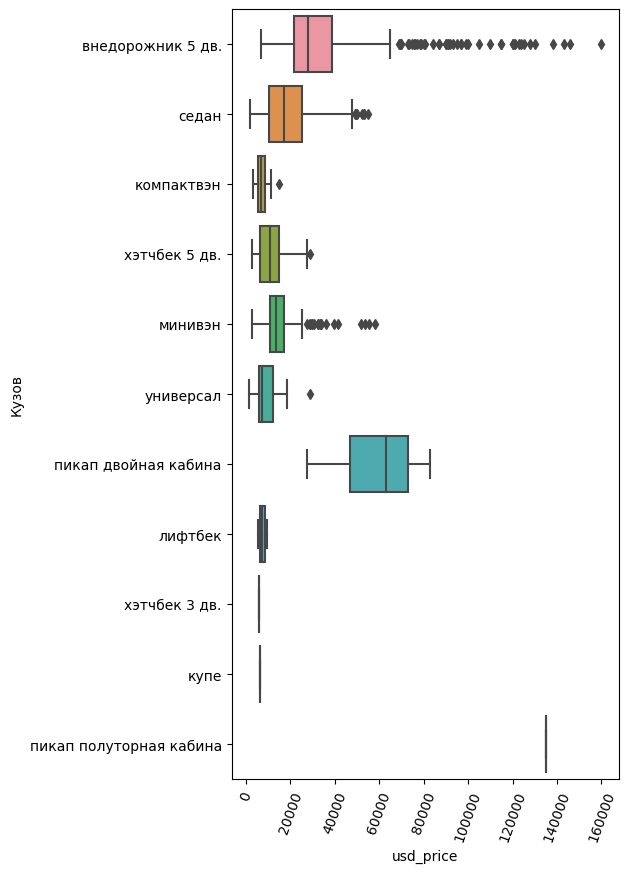

In [ ]:
plt.subplots(figsize=(5, 10))
sns.boxplot(y = toyota['Кузов'], x = toyota.usd_price)
plt.xticks(rotation=70)

In [ ]:
toyota['Кузов'].value_counts()

седан                      939
внедорожник 5 дв.          629
хэтчбек 5 дв.              240
минивэн                    108
компактвэн                  85
универсал                   50
пикап двойная кабина        13
лифтбек                      3
хэтчбек 3 дв.                1
купе                         1
пикап полуторная кабина      1
Name: Кузов, dtype: int64

<Axes: xlabel='Кузов'>

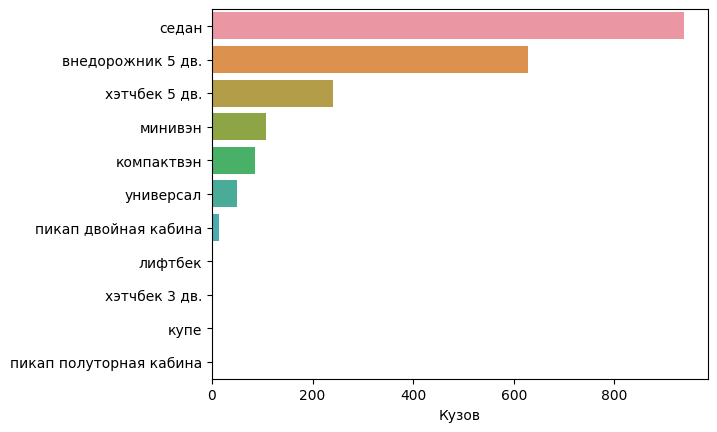

In [ ]:
sns.barplot(y = toyota['Кузов'].value_counts().index, x = toyota['Кузов'].value_counts())

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'description', 'обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон

In [ ]:
auto = pd.DataFrame({'year': df[df['Коробка'] != 'механика']['Год выпуска'].value_counts().index, 'count': df[df['Коробка'] != 'механика']['Год выпуска'].value_counts()})

In [ ]:
auto = auto.reset_index(drop=True)

In [ ]:
auto

,year,count
0,2017,937
1,2016,770
2,2018,769
3,2003,547
4,2019,462
5,2004,399
6,2020,373
7,2002,362
8,2021,307
9,2005,304


<Axes: xlabel='year', ylabel='count'>

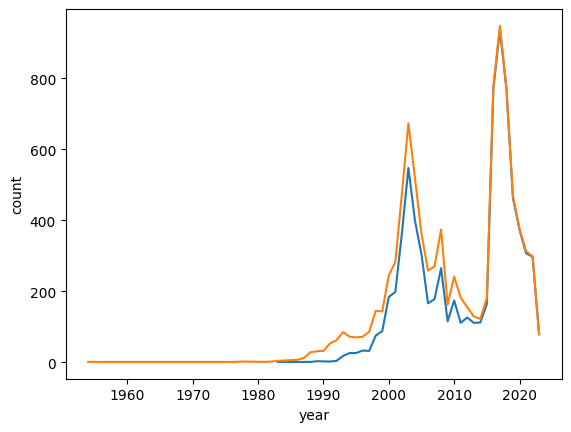

In [ ]:
sns.lineplot(x = 'year', y = 'count', data=auto)
sns.lineplot(x = 'index', y = 'Год выпуска', data=all)

In [ ]:
all = df['Год выпуска'].value_counts().reset_index().rename({'index': 'year'})

Возьмем тойоты. Взять 2-3 самых распространенных модели, и посмотреть, в каком ценовом диапазоне и с каким пробегом машины данной модели наиболее популярны.


In [ ]:
toyota.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'description', 'обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон

In [ ]:
toyota.model.value_counts().head(3).index[:4]

Index(['Camry', 'RAV4', 'Highlander'], dtype='object')

In [ ]:
import plotly.express as px

In [ ]:
t_model = ['Camry', 'RAV4', 'Highlander']
toyota_model = toyota[(toyota['Пробег']<250000) & (toyota['usd_price']<100000) & (toyota.model.isin(t_model))]
px.scatter(toyota_model, x="Пробег", y="usd_price", color="model",
                 size='views')

In [ ]:
toyota.loc[toyota.model == 'Camry', ['usd_price', 'views', 'Год выпуска', 'Пробег', 'engine_volume']].describe()

,usd_price,views,Год выпуска,Пробег,engine_volume
count,675.000000,675.000000,675.000000,675.000000,675.000000
mean,21254.413333,802.734815,2014.389630,124887.413333,2.528444
std,9791.219955,1123.861274,5.995613,92639.766076,0.230706
min,1500.000000,13.000000,1988.000000,1.000000,2.000000
25%,13850.000000,158.500000,2012.000000,57600.000000,2.500000
50%,19000.000000,409.000000,2017.000000,106000.000000,2.500000
75%,27000.000000,982.000000,2018.000000,177200.000000,2.500000
max,55000.000000,9657.000000,2023.000000,920000.000000,3.500000


In [ ]:
camry = toyota.loc[toyota.model == 'Camry']

In [ ]:
mask1 = camry.usd_price > (camry.usd_price.mean() - camry.usd_price.std())
mask2 = camry.usd_price < (camry.usd_price.mean() + camry.usd_price.std())
camry[mask1 & mask2][['usd_price', 'views', 'Год выпуска', 'Пробег', 'engine_volume']].describe()

,usd_price,views,Год выпуска,Пробег,engine_volume
count,459.000000,459.000000,459.000000,459.000000,459.000000
mean,20489.705882,802.993464,2015.786492,117423.418301,2.527887
std,5403.140054,1174.131316,3.521325,76839.068569,0.189016
min,11500.000000,13.000000,2004.000000,1127.000000,2.000000
25%,16250.000000,149.500000,2015.000000,70000.000000,2.500000
50%,19500.000000,384.000000,2017.000000,103000.000000,2.500000
75%,25000.000000,918.000000,2018.000000,155500.000000,2.500000
max,31000.000000,9657.000000,2022.000000,920000.000000,3.500000


In [ ]:
px.scatter(camry, x = 'Год выпуска', y = 'usd_price', size='Пробег', color='engine_volume', size_max=50)

In [ ]:
dff = camry.groupby('Год выпуска').agg({'Пробег': 'mean', 'usd_price': 'median'})

In [ ]:
dff

,Пробег,usd_price
Год выпуска,,
1988,219460.000000,1500.0
1998,140000.000000,5450.0
1999,150000.000000,5120.0
2000,279000.000000,7000.0
2001,256666.666667,7000.0
2002,235134.823529,8875.0
2003,235705.920000,9000.0
2004,247653.000000,10000.0
2005,238251.541667,10800.0


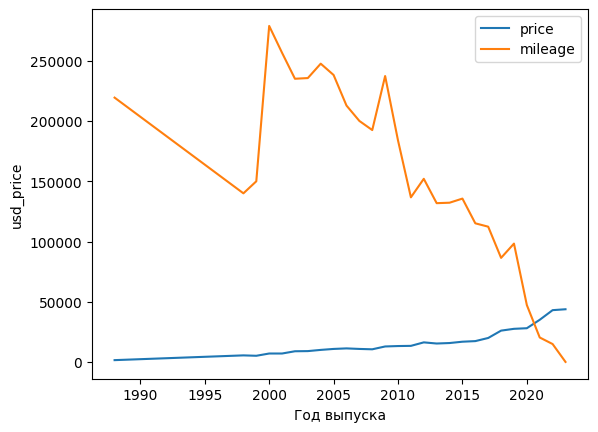

In [ ]:
sns.lineplot(x=dff.index, y= dff.usd_price, label='price')
sns.lineplot(x=dff.index, y= dff['Пробег'], label='mileage')
plt.legend()

Возьмем очень бюджетные машины. Покупатель - семейный чел с детьми. Ему нужна большая машина. Что ему более всего подойдет на рынке? Бюджет у него 7000 долл. Какой у машины будет пробег, что это будет за брэнд, какой год выпуска

In [ ]:
type = pd.Series(['внедорожник 5 дв.',  'минивэн', 'внедорожник'])

In [ ]:
df['Кузов'].unique()

array(['внедорожник 5 дв.', 'седан', 'минивэн', 'лифтбек',
       'хэтчбек 5 дв.', 'универсал', 'компактвэн', 'пикап двойная кабина',
       'кабриолет', 'купе', 'хэтчбек', 'внедорожник 3 дв.',
       'хэтчбек 3 дв.', 'внедорожник', 'пикап полуторная кабина',
       'микровэн', 'родстер', 'пикап одинарная кабина', 'фургон'],
      dtype=object)

In [ ]:
br = pd.Series(['Honda', 'Toyota', 'Nissan', 'Mitsubishi'])

In [ ]:
family_car = df[(df['usd_price']<8000) & (df['usd_price']> 6000) & (df['Кузов'].isin(type)) & (df.brand != 'ВАЗ (Lada)') & (df.brand.isin(br)) & (df['Пробег'] <= 260000)]

In [ ]:
family_car.brand.unique()

array(['Honda', 'Toyota', 'Mitsubishi', 'Nissan'], dtype=object)

In [ ]:
family_car[['brand', 'model']].describe()

,brand,model
count,76,76
unique,4,16
top,Honda,Odyssey
freq,53,21


In [ ]:
family_car.describe()

,views,likes,adv_added,usd_price,price_kgs,Год выпуска,Пробег,обвес,тонировка,спойлер,...,сабвуфер,биксенон,омыватель фар,газобалонное оборудование,ксенон,комбинированный,автозавод,велюр,engine_volume,complectation_scor
count,76.000000,57.000000,76.000000,76.000000,76.000000,76.000000,76.000000,20.0,30.0,17.0,...,4.0,4.0,1.0,10.0,22.0,10.0,9.0,31.0,76.000000,76.000000
mean,693.947368,5.754386,559.486842,7117.828947,625525.526316,2001.144737,170530.671053,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.239474,0.283976
std,998.073329,5.494415,921.919989,474.209950,41652.867077,2.037672,83391.118934,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.425544,0.284794
min,28.000000,1.000000,7.000000,6030.000000,530000.000000,1996.000000,2023.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.600000,0.000000
25%,118.500000,2.000000,24.000000,6687.500000,587518.500000,2000.000000,100000.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,0.000000
50%,345.500000,4.000000,144.000000,7150.000000,628413.500000,2001.000000,202061.500000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.150000,0.241072
75%,749.000000,7.000000,672.000000,7500.000000,659175.000000,2003.000000,242967.750000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.400000,0.498163
max,5998.000000,25.000000,5040.000000,7900.000000,694331.000000,2005.000000,260000.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.500000,0.927695



# В каком ценовом диапазоне и с каким пробегом часто ищут лексусы.

In [ ]:
lexus = df[df.brand == 'Lexus']

In [ ]:
Q1 = lexus['Пробег'].quantile(0.25)
Q3 = lexus['Пробег'].quantile(0.75)
IQR = Q3 - Q1

lexus = lexus[((lexus['Пробег'] >= Q1 - 1.5 * IQR) & (lexus['Пробег'] <= Q3 + 1.5 * IQR))]
lexus

,brand,model,location,views,likes,adv_added,today,usd_price,price_kgs,Год выпуска,...,биксенон,омыватель фар,газобалонное оборудование,ксенон,комбинированный,автозавод,велюр,engine_type,engine_volume,complectation_scor
0,Lexus,LX,Бишкек,2367.0,1.0,168.0,2023-04-10 09:18:07.185721+06:00,88000.0,7730800.0,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,дизель,4.5,1.155046
3,Lexus,GX,Бишкек,3557.0,6.0,24.0,2023-04-10 09:18:07.185721+06:00,25900.0,2275315.0,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,бензин,4.7,0.813824
4,Lexus,LX,Бишкек,3744.0,5.0,24.0,2023-04-10 09:18:07.185721+06:00,98000.0,8609300.0,2017,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,бензин,5.7,1.393224
5,Lexus,LX,Ош,2980.0,10.0,15.0,2023-04-10 09:18:07.185721+06:00,38000.0,3338300.0,2010,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,бензин,5.7,1.441229
6,Lexus,GX,Бишкек,4913.0,5.0,48.0,2023-04-10 09:18:07.185721+06:00,65000.0,5710250.0,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,бензин,4.6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,Lexus,GS,Бишкек,150.0,NaN,48.0,2023-04-10 09:18:07.185721+06:00,35800.0,3146462.0,2016,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,бензин,2.0,0.988565
9975,Lexus,GX,Джалал-Абад,158.0,NaN,48.0,2023-04-10 09:18:07.185721+06:00,28000.0,2460920.0,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,бензин,4.7,0.000000
9979,Lexus,LX,Бишкек,153.0,NaN,48.0,2023-04-10 09:18:07.185721+06:00,16500.0,1450185.0,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,бензин,4.7,0.000000
9989,Lexus,RX,Ош,93.0,NaN,48.0,2023-04-10 09:18:07.185721+06:00,27000.0,2373030.0,2010,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,бензин,3.5,0.860547


In [ ]:
ldf = lexus.groupby(['model', 'Год выпуска', 'Пробег'], as_index=False).agg({'usd_price': 'median'}).sort_values(by='Год выпуска', ascending=False)

In [ ]:
ldf.describe()

,Год выпуска,Пробег,usd_price
count,759.000000,759.000000,759.000000
mean,2012.164690,132454.613966,37369.631094
std,6.111153,76693.373716,26700.390215
min,1998.000000,6.000000,6800.000000
25%,2007.000000,72000.000000,20700.000000
50%,2013.000000,130000.000000,30800.000000
75%,2017.000000,188000.000000,46690.000000
max,2022.000000,350000.000000,269000.000000


In [ ]:
ldf[['usd_price', 'Пробег']].describe()

,usd_price,Пробег
count,759.000000,759.000000
mean,37369.631094,132454.613966
std,26700.390215,76693.373716
min,6800.000000,6.000000
25%,20700.000000,72000.000000
50%,30800.000000,130000.000000
75%,46690.000000,188000.000000
max,269000.000000,350000.000000


In [ ]:
px.scatter(ldf, x = 'Пробег', y = 'usd_price', size='Год выпуска', color='model', size_max=10)

# Влияет ли на цену растоможка.

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'description', 'обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон

In [ ]:
df['Таможня'].unique()

array(['растаможен', nan, 'не растаможен'], dtype=object)

In [ ]:
df.dropna(subset=['Таможня'], inplace=True)

In [ ]:
df['Таможня'].unique()

array(['растаможен', 'не растаможен'], dtype=object)

In [ ]:
dict = {'растаможен': 1, 'не растаможен': 0}
df['Таможня'] = df['Таможня'].replace(dict)

In [ ]:
df['usd_price'].corr(df['Таможня'])

0.020021394030399986

In [ ]:
np.corrcoef(df['usd_price'], df['Таможня'])

array([[1.        , 0.02002139],
       [0.02002139, 1.        ]])

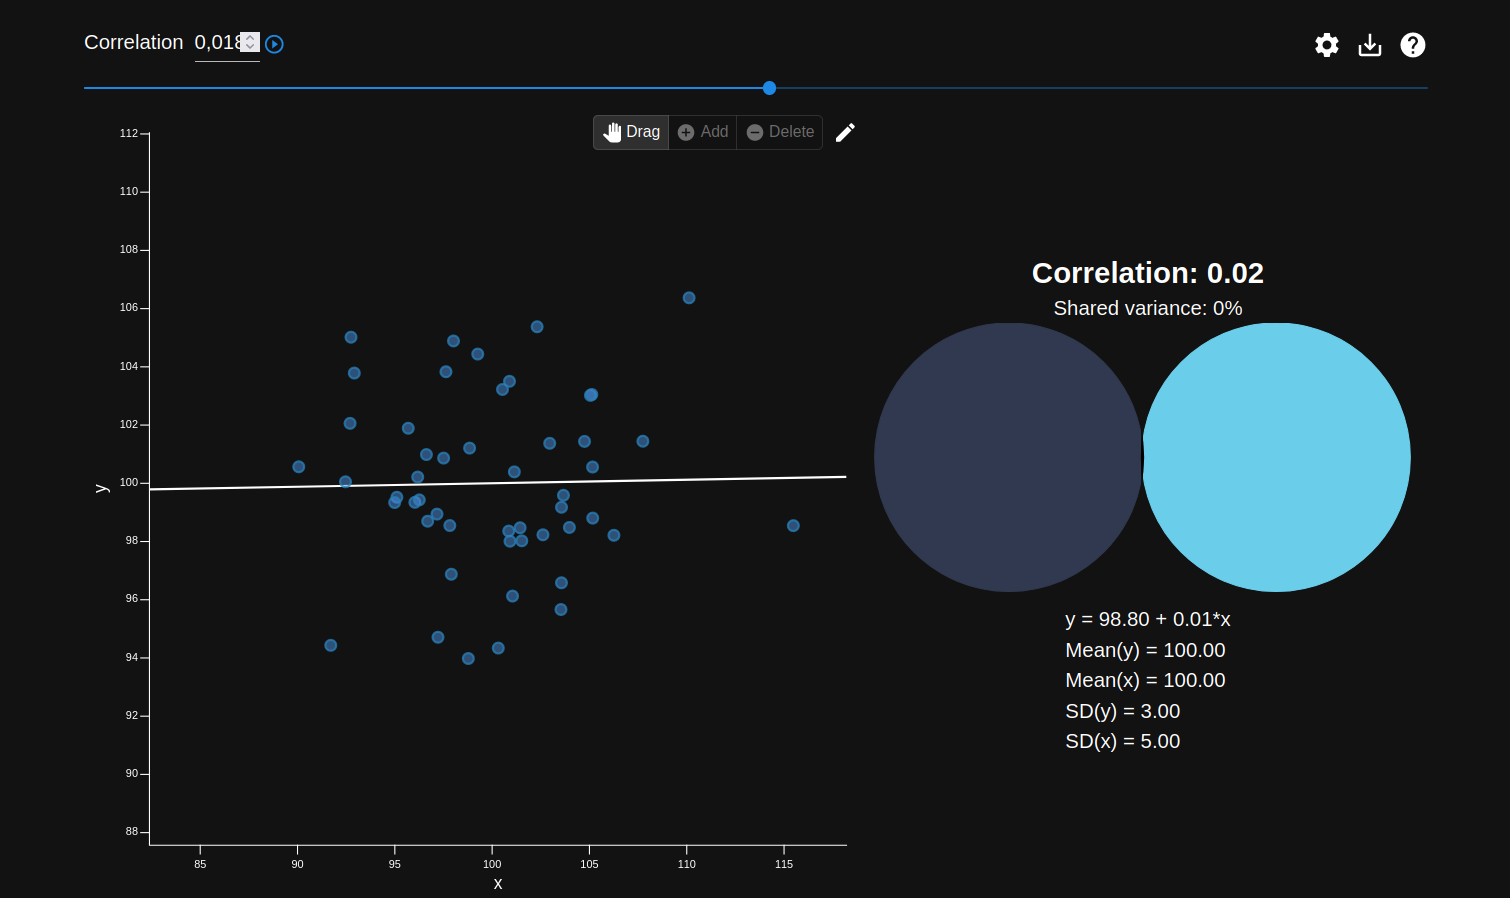

# Зависимость цены от локации (города) (целесообразно сегментировать по брэнду итд)

In [ ]:
camry.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'description', 'обвес',
       'тонировка', 'спойлер', 'кожа', 'дерево', 'CD', 'DVD', 'MP3', 'USB',
       'антиблокировочная система (ABS)', 'антипробуксовочная система',
       'система курсовой устойчивости', 'подушки безопасности', 'парктроник',
       'камера заднего вида', 'полный электропакет', 'сигнализация',
       'кондиционер', 'климат контроль', 'круиз-контроль',
       'подогрев передних сидений', 'подогрев всех сидений', 'обогрев зеркал',
       'пневмоподвеска', 'память сидений', 'память руля', 'датчик дождя',
       'датчик света', 'корректор фар', 'центральный замок', 'литые диски',
       'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон', 'омыватель фар',
       'газобалонное оборудование', 'ксенон

In [ ]:
camry['location'].value_counts()

Бишкек           526
Ош                55
Джалал-Абад       16
Кызыл-Кия          7
Кант               3
Токмок             3
Каракол            3
Кербен             3
Кара-Куль          2
Кадамжай           2
Сокулук            1
Баткен             1
Ала-Бука           1
Кочкор-Ата         1
Нарын              1
Кара-Балта         1
Боконбаево         1
Узген              1
Беловодское        1
Дароот-Коргон      1
Name: location, dtype: int64

In [ ]:
drop_val = ['Казахстан', 'Китай', 'Россия', 'США', 'Южная Корея', 'Канада']
camry.drop(camry[camry['location'].isin(drop_val)].index.tolist(), axis=0, inplace=True)

<ipython-input-144-ce457e71a4ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Удалаем аутлаер

In [ ]:
camry[(camry['usd_price'] == 8900) & (camry['Год выпуска'] == 2018)]

,brand,model,location,views,likes,adv_added,today,usd_price,price_kgs,Год выпуска,...,биксенон,омыватель фар,газобалонное оборудование,ксенон,комбинированный,автозавод,велюр,engine_type,engine_volume,complectation_scor
6636,Toyota,Camry,Бишкек,1047.0,1.0,168.0,2023-04-10 09:18:07.185721+06:00,8900.0,782221.0,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,бензин,2.5,0.0


In [ ]:
camry.drop(6636, axis=0, inplace=True)

<ipython-input-154-8b4eb67ff73b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dff_2 = camry[camry['Год выпуска'] == 2018].groupby('location', as_index=False).agg({'usd_price': 'mean'})
dff_2

,location,usd_price
0,Бишкек,27345.628099
1,Джалал-Абад,26650.000000
2,Каракол,25500.000000
3,Ош,26471.428571
4,Токмок,23000.000000


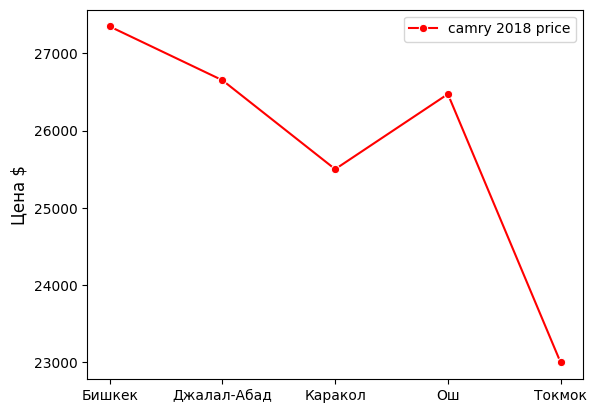

In [ ]:
sns.lineplot(x=dff_2['location'], y= dff_2['usd_price'], label='camry 2018 price', color='red', marker='o')
plt.ylabel('Цена $', fontsize=12)
plt.xlabel('')
plt.legend()

In [ ]:
df.columns

Index(['brand', 'model', 'location', 'views', 'likes', 'adv_added', 'today',
       'usd_price', 'price_kgs', 'Год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Двигатель', 'Коробка', 'Привод', 'Руль', 'Состояние', 'Таможня',
       'Обмен', 'Наличие', 'Регион, город продажи', 'Учёт', 'Прочее',
       'description', 'обвес', 'тонировка', 'спойлер', 'кожа', 'дерево', 'CD',
       'DVD', 'MP3', 'USB', 'антиблокировочная система (ABS)',
       'антипробуксовочная система', 'система курсовой устойчивости',
       'подушки безопасности', 'парктроник', 'камера заднего вида',
       'полный электропакет', 'сигнализация', 'кондиционер', 'климат контроль',
       'круиз-контроль', 'подогрев передних сидений', 'подогрев всех сидений',
       'обогрев зеркал', 'пневмоподвеска', 'память сидений', 'память руля',
       'датчик дождя', 'датчик света', 'корректор фар', 'центральный замок',
       'литые диски', 'люк', 'бортовой компьютер', 'сабвуфер', 'биксенон',
       'омыватель фар', 'газобалонное 

In [ ]:
df.Таможня.unique()

array(['растаможен', nan, 'не растаможен'], dtype=object)

<Axes: xlabel='usd_price'>

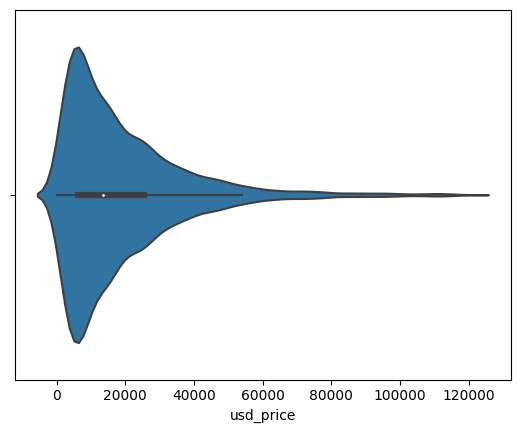

In [ ]:
sns.violinplot(data = df, x = 'usd_price', hue=df['Таможня'])